## Plot experiment results

In [1]:
%matplotlib inline
from collections import OrderedDict
import numpy as np
from matplotlib import pyplot as plt


## Methods and filenames

In [2]:
runs = OrderedDict()
runs["truth"] = "truth_20200906_144303"
runs["mle"] = "mle_20200906_144343"
runs["random"] = "random_20200906_144459"
runs["greedy"] = "greedy_20200906_144345"
runs["beamsearch_s"] = "beamsearch_s_20200906_144347"
runs["beamsearch_m"] = "beamsearch_m_20200906_144350"
runs["beamsearch_l"] = "beamsearch_l_20200906_144353"
runs["mcbs_s"] = "mcbs_debug_20200907_082858"
runs["mcbs_m"] = "mcbs_m_20200906_144419"
runs["mcbs_l"] = "mcbs_l_20200906_144432"


In [3]:
labels = {}
labels["truth"] = "Truth"
labels["mle"] = "MLE"
labels["random"] = "Random"
labels["greedy"] = "Greedy"
labels["beamsearch_s"] = "Beam search S"
labels["beamsearch_m"] = "Beam search M"
labels["beamsearch_l"] = "Beam search L"
labels["mcbs_s"] = "MCTS S"
labels["mcbs_m"] = "MCTS M"
labels["mcbs_l"] = "MCTS L"


In [4]:
colors = {}
colors["truth"] = "black"
colors["mle"] = "C1"
colors["random"] = "0.65"
colors["greedy"] = "C0"
colors["beamsearch_s"] = "C2"
colors["beamsearch_m"] = "C2"
colors["beamsearch_l"] = "C2"
colors["mcbs_s"] = "C3"
colors["mcbs_m"] = "C3"
colors["mcbs_l"] = "C3"


In [5]:
linestyles = {}
linestyles["truth"] = "--"
linestyles["mle"] = "-"
linestyles["random"] = ":"
linestyles["greedy"] = "-"
linestyles["beamsearch_s"] = ":"
linestyles["beamsearch_m"] = "--"
linestyles["beamsearch_l"] = "-"
linestyles["mcbs_s"] = ":"
linestyles["mcbs_m"] = "--"
linestyles["mcbs_l"] = "-"


## Load results

In [6]:
n_jets = 500
run_dir = "./data/runs"

jet_sizes = np.nan * np.ones(n_jets)
log_likelihoods = {}

for key, run in runs.items():
    try:
        log_likelihoods[key] = np.load(f"{run_dir}/{run}/eval_log_likelihood.npy").flatten()
        jet_sizes = np.load(f"{run_dir}/{run}/eval_jet_sizes.npy")
    except Exception as e:
        print(e)
        log_likelihoods[key] = np.nan * np.ones(n_jets)
        pass


[Errno 2] No such file or directory: './data/runs/mcbs_m_20200906_144419/eval_log_likelihood.npy'
[Errno 2] No such file or directory: './data/runs/mcbs_l_20200906_144432/eval_log_likelihood.npy'


## Normalize results

In [7]:
norm_key = "greedy"
rel_log_likelihoods = {}

for key, val in log_likelihoods.items():
    rel_log_likelihoods[key] = val - log_likelihoods[norm_key]


## Bin results

In [8]:
# n_bins = 5
# bin_boundaries = np.percentile(jet_sizes, np.linspace(0., 100., n_bins + 1)).astype(np.float)
# bin_boundaries[0] -= 0.01
# bin_boundaries[-1] += 0.01
bin_boundaries = [1.5] + list(np.arange(7.5, 19, 2)) + [20.5]


In [9]:
bin_jet_size = {}
bin_log_likelihood = {}
bin_log_likelihood_err = {}

for key in runs.keys():
    bin_jet_size_ = []
    bin_log_likelihood_ = []
    bin_log_likelihood_err_ = []
    
    for bin_min, bin_max in zip(bin_boundaries[:-1], bin_boundaries[1:]):
        x = jet_sizes[(jet_sizes >= bin_min) * (jet_sizes < bin_max)]
        y = rel_log_likelihoods[key][(jet_sizes >= bin_min) * (jet_sizes < bin_max)]
        bin_jet_size_.append(np.mean(x))
        bin_log_likelihood_.append(np.mean(y))
        bin_log_likelihood_err_.append(np.std(y) / (len(x)**0.5 + 1.e-9))
        
    bin_jet_size[key] = np.asarray(bin_jet_size_)
    bin_log_likelihood[key] = np.asarray(bin_log_likelihood_)
    bin_log_likelihood_err[key] = np.asarray(bin_log_likelihood_err_)


## Plot results

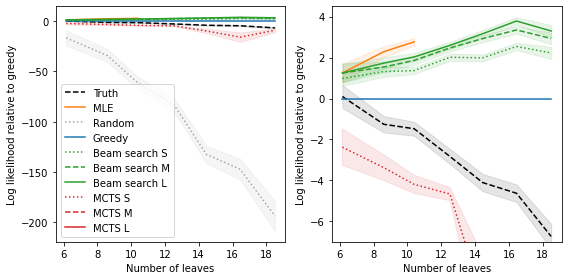

In [10]:
fig = plt.figure(figsize=(8,4))

for panel in range(2):
    ax = plt.subplot(1, 2, panel+1)
    
    for key in runs.keys():
        x, y, dy = bin_jet_size[key], bin_log_likelihood[key], bin_log_likelihood_err[key]
        c, ls, lbl = colors[key], linestyles[key], labels[key]

        plt.fill_between(x, y-dy, y+dy, color=c, alpha=0.1)
        plt.plot(x, y, c=c, lw=1.5, ls=ls, label=lbl)

    if panel == 0:
        plt.legend()
    else:
        plt.ylim(-7, 4.5)

    plt.xlabel("Number of leaves")
    plt.ylabel(f"Log likelihood relative to {norm_key}")

plt.tight_layout()
plt.savefig("figures/rl_ginkgo_log_likelihood.pdf")
